In [2]:
# Instalação das bibliotecas necessárias
%pip install pandas --quiet
%pip install matplotlib --quiet
%pip install seaborn --quiet

# Célula 1: carregar o arquivo dados_brutos.csv
import pandas as pd
# Lê o CSV que está na mesma pasta do notebook
df = pd.read_csv('dados_brutos.csv', encoding='utf-8')
df

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.9520,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.2410,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.6430,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.9320,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.0820,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352296,837778,Rain Dog Garden Home,0.000,0,Released,2021-06-03,0,1,False,/fBMPvg8iZcSVZCPQE0iuncIM4Q1.jpg,...,Rain Dog Garden Home,How we felt the rain ? It's truly amazing to s...,0.6000,/yhNyo1dYV3F1Ss4yek5tFXaRfdW.jpg,Short,Drama,NEE,NaN,NaN,family drama
1352297,837779,Schismes,0.000,0,Released,2014-06-04,0,7,False,NaN,...,Schismes,Rioting in different countries is confronted w...,0.6000,NaN,NaN,NaN,NaN,France,French,NaN
1352298,837781,The Story of Jackie Pullinger; The Law of Love,0.000,0,Released,1998-01-01,0,53,False,NaN,...,The Story of Jackie Pullinger; The Law of Love,Twenty-two-year old Jackie Pullinger graduated...,0.6000,/3CW1zWDzxIW1zApXSEQf1vlKeEc.jpg,NaN,Documentary,NaN,NaN,NaN,NaN
1352299,837782,The Beautiful Ones,0.000,0,Released,2019-10-23,0,0,True,NaN,...,The Beautiful Ones,Gorgeous lesbians and romantic settings make f...,0.6000,/qLoBHLskhQLvURgD9ZVoTLZk3Uz.jpg,NaN,NaN,Nubile Films,United States of America,NaN,NaN


## Verificação da Base de Dados

A base de dados foi carregada sem problemas.  
Abaixo, irei demonstrar os **5 primeiros elementos** para demonstrar que está tudo de acordo.


In [5]:
# Célula 2: mostrar as 5 primeiras linhas do DataFrame
df_head = df.head(5)
df_head

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


# Top 10 Filmes Mais Populares até 2024

Abaixo estão os 10 filmes com **mais votos** no IMDb até 2024, refletindo a popularidade do público.

In [ ]:
#Ordena os filmes mais votados
# Garante que as colunas estejam numéricas
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')

# Ordena pela quantidade de votos do maior para o menor
top_10 = df.sort_values('vote_count', ascending=False).head(10)

# Mostra título, nota e quantidade de votos
print(top_10[['title', 'vote_average', 'vote_count']].to_string(index=False))



                  title  vote_average  vote_count
              Inception         8.364       34495
           Interstellar         8.417       32571
        The Dark Knight         8.512       30619
                 Avatar         7.573       29815
           The Avengers         7.710       29166
               Deadpool         7.606       28894
 Avengers: Infinity War         8.255       27713
             Fight Club         8.438       27238
Guardians of the Galaxy         7.906       26638
           Pulp Fiction         8.488       25893


# A Qualidade dos Filmes ao Longo do Tempo

Será que a qualidade dos filmes melhorou com o passar das décadas, ou a qualidade geral cinematógráfica está decaindo? 
Obviamente o padrão de exigência do telespectador aumentou, pórem, será que mesmo com um aumento das avaliações, a média geral dos filmes se mantém?

Os gráficos abaixo indicam que filmes antigos tendiam a ter notas maiores. Isso se deve porque existiam menos lançamentos e provavelmente um número de outliers considerável, porém mesmo com essas observações pode se observar que a média dos filmes de 2000 até 2020 acontece uma certa estabilização da média, com exceção de um declinio que pode ser visto no meio do intervalo, algo próximo do


year
1895.0    3.528712
1896.0    2.891893
1897.0    2.294144
1898.0    2.116858
1899.0    2.705021
            ...   
2020.0    1.897267
2021.0    1.768327
2022.0    1.764301
2023.0    1.153995
2024.0    0.502138
Name: vote_average, Length: 130, dtype: float64


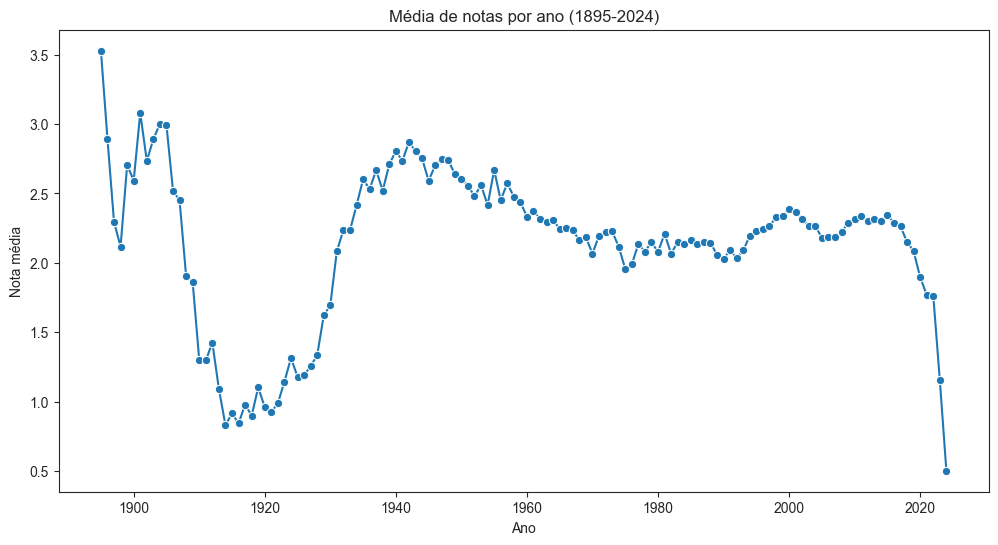

In [ ]:
# Recarrega o df para garantir dados limpos
df = pd.read_csv('dados_brutos.csv', encoding='utf-8')

# Converte a coluna 'vote_average' para número, valores inválidos viram NaN
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

# Extrai o ano da coluna 'release_date' (formato YYYY-MM-DD)
# Datetime arruma datas invalidas nessa coluna
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Filtra apenas linhas com ano válido
df_limpo = df.dropna(subset=['year', 'vote_average'])

# Filtra anos de 1895 a 2030 para focar em filmes reais e lançamentos recentes
df_limpo = df_limpo[(df_limpo['year'] >= 1895) & (df_limpo['year'] <= 2024)]

# Agrupa por ano e calcula a nota média de cada ano
media_por_ano = df_limpo.groupby('year')['vote_average'].mean().sort_index()

# Mostra a média de cada ano
print(media_por_ano)

# Importando Bibliotecas para plotagem
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# Define o estilo do Seaborn
sns.set_style('ticks')

plt.figure(figsize=(12,6))
sns.lineplot(x=media_por_ano.index, y=media_por_ano.values, marker='o')
plt.title("Média de notas por ano (1895-2024)")
plt.xlabel("Ano")
plt.ylabel("Nota média")

# Configura os intervalos do eixo X para 10 em 10 anos
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.xticks(rotation=45)  # Rotaciona os labels para melhor visualização

plt.show()

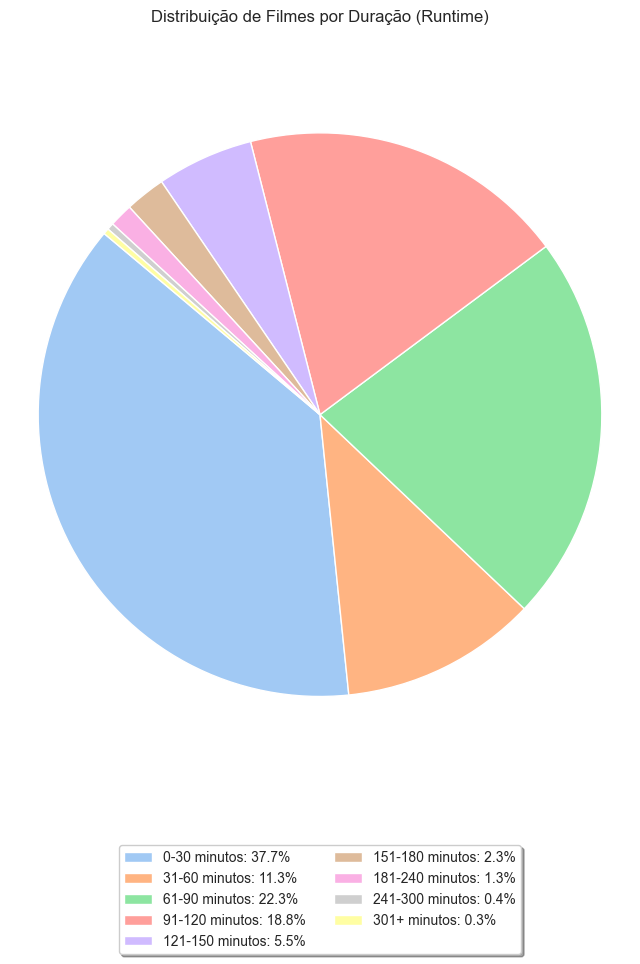

In [ ]:
# Gráfico de pizza para distribuição de runtime por intervalos

# Recarrega o df
df = pd.read_csv('dados_brutos.csv', encoding='utf-8')

# Converte runtime para numérico
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Filtra runtime válido e razoável
df_limpo = df.dropna(subset=['runtime'])
df_limpo = df_limpo[(df_limpo['runtime'] >= 1) & (df_limpo['runtime'] <= 600)]

# Definindo intervalos (em minutos)
bins = [0, 30, 60, 90, 120, 150, 180, 240, 300, 600] #Intervalos 
labels = ['0-30 minutos', '31-60 minutos', '61-90 minutos', '91-120 minutos', '121-150 minutos', '151-180 minutos', '181-240 minutos', '241-300 minutos', '301+ minutos']

df_limpo['runtime_range'] = pd.cut(df_limpo['runtime'], bins=bins, labels=labels, right=True)

# Conta a frequência de cada intervalo
runtime_counts = df_limpo['runtime_range'].value_counts().sort_index()

# Calcula porcentagens para o gráfico
total = runtime_counts.sum()
porcentagens = (runtime_counts / total) * 100

# Cria labels para a legenda com porcentagens
legend_labels = [f"{label}: {pct:.1f}%" for label, pct in zip(runtime_counts.index, porcentagens)]

# Importando Bibliotecas para plotagem
import matplotlib.pyplot as plt
import seaborn as sns

# Define a paleta de cores do Seaborn
colors = sns.color_palette('pastel', len(runtime_counts))

# Aumentei a altura para acomodar a legenda
plt.figure(figsize=(8,10))  
plt.pie(runtime_counts.values, startangle=140, colors=colors, textprops={'fontsize': 14})
plt.title("Distribuição de Filmes por Duração (Runtime)")
plt.axis('equal')  # Gráfico circular

# Adiciona legenda abaixo com porcentagens
plt.legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

plt.show()



## Análise de Outliers

Abaixo, faremos uma análise sobre os outliers, valores que podem ser erros ou exceções na base.

Como mostra o gráfico de dispersão abaixo, podemos concluir que múltiplos filmes da base de dados do IMDb estão com nota 10, porém sem nenhum voto, o que gera certa inconsistência nos dados. Para a camada silver, esses outliers serão retirados.

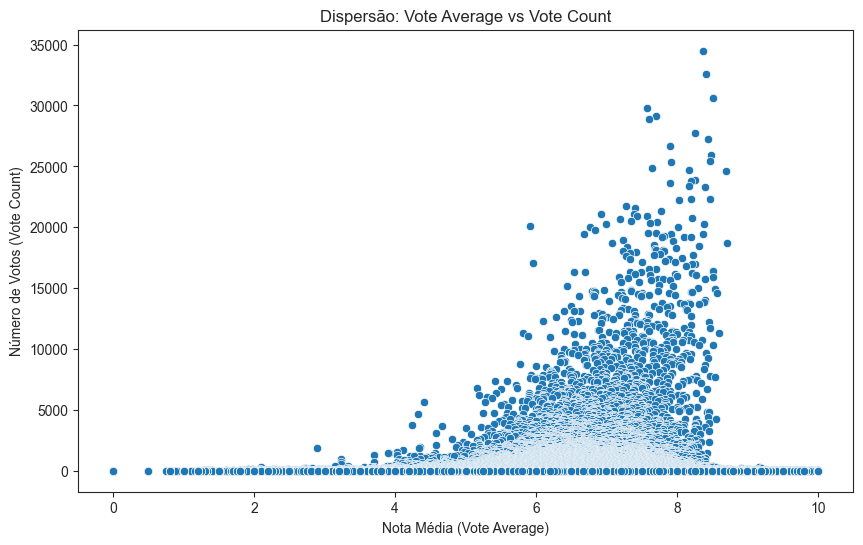

Possíveis outliers (poucos votos, nota alta):
                            title  vote_average  vote_count
1349609                 Black Cat          10.0           0
1330998       Daddy Daughter Trip          10.0           0
1323287             Freedom of NC          10.0           0
1218579                   Aerojet          10.0           0
1185118                     Yampa          10.0           0
1182700           The Yellow Bike          10.0           0
1178126                  湘西剿匪记 上集          10.0           0
1166241       Gazo : Zénith Paris          10.0           0
1149617  Dracula: The Restoration          10.0           0
1147520           The Park Stroll          10.0           0


In [ ]:
# Novo gráfico: dispersão para detectar outliers entre vote_average e vote_count
df = pd.read_csv('dados_brutos.csv', encoding='utf-8')

# Converte para numérico e remove NaN
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
df_limpo = df.dropna(subset=['vote_average', 'vote_count'])

# Gráfico de dispersão
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
plt.figure(figsize=(10,6))
sns.scatterplot(x='vote_average', y='vote_count', data=df_limpo)
plt.title('Dispersão: Vote Average vs Vote Count')
plt.xlabel('Nota Média (Vote Average)')
plt.ylabel('Número de Votos (Vote Count)')
plt.show()

# Identificar possíveis outliers: filmes com poucos votos mas notas altas
# Ajuste os thresholds conforme necessário, talvez seja necessário intervalos maiores (ex: vote_count < 1000, vote_average > 7.5)
outliers = df_limpo[(df_limpo['vote_count'] < 100) & (df_limpo['vote_average'] > 8)].sort_values('vote_average', ascending=False)
print("Possíveis outliers (poucos votos, nota alta):")
print(outliers[['title', 'vote_average', 'vote_count']].head(10))

# Contagem de Produtoras por Filme

Muitas vezes, filmes são produzidos por múltiplas produtoras. Abaixo, podemos ver a contagem de produtoras envolvidas na produção dos filmes.

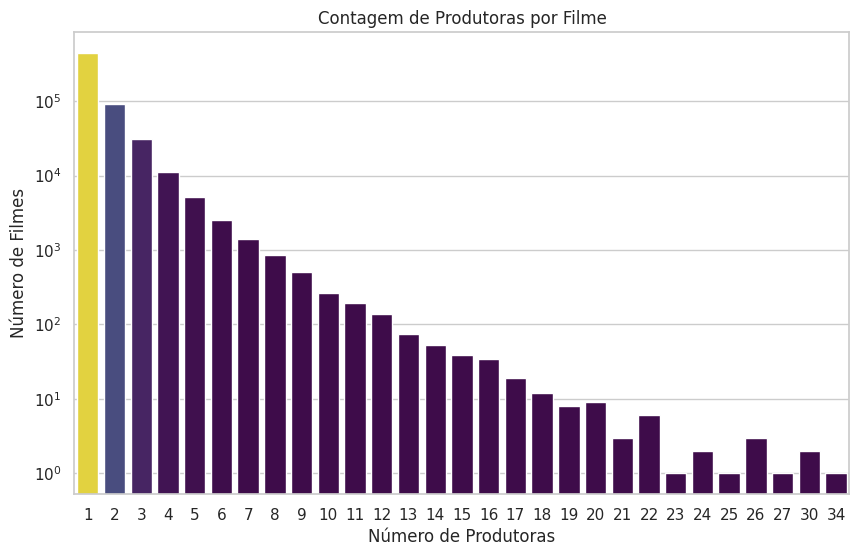

In [36]:
# Análise das Produtoras com Mais Filmes Produzidos

# Recarrega o df
df = pd.read_csv('dados_brutos.csv', encoding='utf-8')

# Contagem de produtoras por filme
from collections import Counter
produtora_counter = Counter()

for produtoras in df['production_companies'].dropna():
    # Contar quantidade de produtoras no filme
    produtoras_list = produtoras.split(',')
    produtoras_count = len(produtoras_list)
    produtora_counter[produtoras_count] += 1

# Importa o seaborn para visualização
import seaborn as sns

# Converte o Counter para DataFrame para facilitar a plotagem
produtora_df = pd.DataFrame.from_dict(produtora_counter, orient='index', columns=['Número de Filmes'])
produtora_df.index.name = 'Número de Produtoras'
produtora_df = produtora_df.sort_index()

# Plotagem
plt.figure(figsize=(10,6))
ax = sns.barplot(x=produtora_df.index, y=produtora_df['Número de Filmes'], palette="viridis", hue=produtora_df['Número de Filmes'], legend=False)
ax.set_yscale('log')  # Escala logarítmica para melhor visualização
plt.title("Contagem de Produtoras por Filme")
plt.xlabel("Número de Produtoras")
plt.ylabel("Número de Filmes")
plt.show()

# Produtoras com Mais Filmes Produzidos

O objetivo desta análise é identificar as produtoras que mais contribuíram para a indústria cinematográfica em termos de quantidade de filmes produzidos.

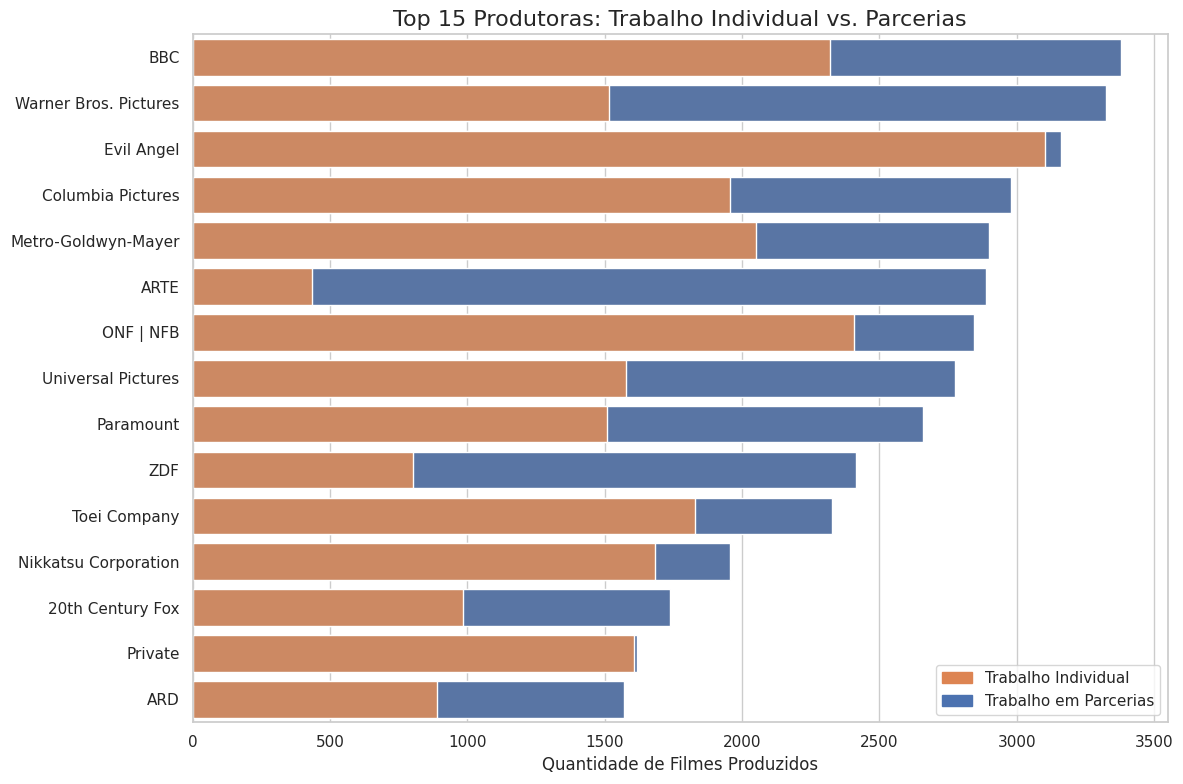

In [37]:
# Análise Comparativa: Trabalho Individual vs. Parcerias nas Top 15 Produtoras

import matplotlib.patches as mpatches

# 1. Carrega e limpa
df = pd.read_csv('dados_brutos.csv', encoding='utf-8')
df = df.dropna(subset=['production_companies'])

# 2. Prepara os dados

# Calcular o TOTAL de aparições (Geral)
total_counts = df['production_companies'].str.split(', ').explode().value_counts()

# Calcular o valor INDIVIDUAL (Solo)
solo_movies = df[~df['production_companies'].str.contains(',')]
solo_counts = solo_movies['production_companies'].value_counts()

# Top 15 produtoras
top_15 = total_counts.head(15).index

df_plot = pd.DataFrame({
    'Produtora': top_15,
    'Total': total_counts[top_15].values,
    'Individual': solo_counts.reindex(top_15, fill_value=0).values
})

df_plot = df_plot.sort_values('Total', ascending=False)

# Plotagem (sobrepor barras)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# 1. Camada de Fundo (TOTAL)
sns.barplot(
    data=df_plot, 
    x='Total', 
    y='Produtora', 
    color='#4c72b0',
    label='Trabalho em Parcerias',
    edgecolor='white'
)

# 2. Camada da Frente (INDIVIDUAL)
sns.barplot(
    data=df_plot, 
    x='Individual', 
    y='Produtora', 
    color='#dd8452',
    label='Trabalho Individual',
    edgecolor='white'
)

plt.title('Top 15 Produtoras: Trabalho Individual vs. Parcerias', fontsize=16)
plt.xlabel('Quantidade de Filmes Produzidos', fontsize=12)
plt.ylabel('')

top_bar = mpatches.Patch(color='#dd8452', label='Trabalho Individual')
bottom_bar = mpatches.Patch(color='#4c72b0', label='Trabalho em Parcerias')
plt.legend(handles=[top_bar, bottom_bar], loc='lower right', frameon=True)

plt.tight_layout()
plt.show()

# Análise da Receita por Quantidade de Produtoras

O objetivo é verificar se o número de produtoras impacta o sucesso financeiro do filme. Para evitar distorções causadas por sucessos isolados (outliers), focaremos na mediana da receita, buscando entender qual é o retorno financeiro mais realista e típico para cada cenário.

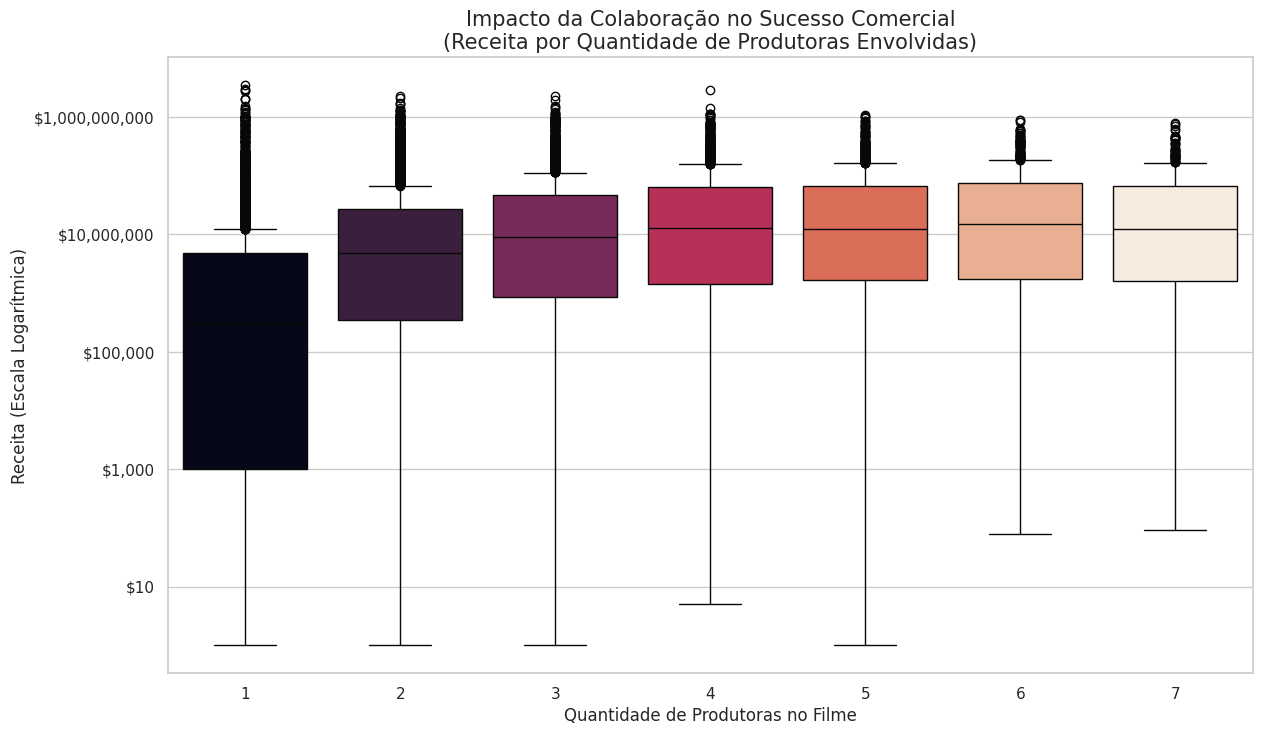

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df['qtd_produtoras'] = df['production_companies'].fillna('a').apply(lambda x: len(str(x).split(',')))

df_financeiro = df[
    (df['qtd_produtoras'] <= 7) &
    (df['revenue'] > 0) 
]

plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

ax = sns.boxplot(
    data=df_financeiro,
    x='qtd_produtoras',
    y='revenue',
    palette='rocket',
    hue='qtd_produtoras',
    legend=False
)

ax.set_yscale("log")

# Títulos e Labels
ax.set_title('Impacto da Colaboração no Sucesso Comercial\n(Receita por Quantidade de Produtoras Envolvidas)', fontsize=15)
ax.set_xlabel('Quantidade de Produtoras no Filme', fontsize=12)
ax.set_ylabel('Receita (Escala Logarítmica)', fontsize=12)

import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '${:,.0f}'.format(y)))

plt.show()